<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 5</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [2]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import roots_legendre


<div style="text-align: center;">
    <h2><strong>Problem 1: Quadrature </strong></h2>
</div>
Let's looked at different quadrature methods and rules. 


<div style="text-align: center;">
    <h2><strong> Midpoint rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx (b - a) \cdot f\left(\frac{a + b}{2}\right)
$$

<div style="text-align: center;">
    <h2><strong> Trapezoidal Rule  </strong></h2>
</div>

$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{2} \left[ f(a) + f(b) \right]$$

<div style="text-align: center;">
    <h2><strong> Simpson's Rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{3} \left[ f(a) + 4f\left(\frac{a + b}{2}\right) + f(b) \right]$$


## A) 
Define a class for all quadrature techniques.

In [3]:
class Quad_:

    def __init__(self, fuc, N, a, b):
        '''The class Quad takes four inputs: 
            fuc: a function input,
            N: number of grid points,
            a,b: left and right points'''
        self.f = fuc
        self.N = N
        self.a = a
        self.b = b
        self.h = (b - a) / N
    def midpoint(self):
        """midpoint rule."""
        x = np.linspace(self.a + 0.5*self.h, self.b - 0.5*self.h, self.N)
        return np.sum(self.f(x)) * self.h

    def trapezoidal(self):
        """trapezoidal rule."""
        x = np.linspace(self.a, self.b, self.N+1)
        y = self.f(x)
        return self.h * (0.5*y[0] + 0.5*y[-1] + np.sum(y[1:-1]))

    def simpsons(self):
        """Simpson's rule."""
        if self.N % 2 == 1:
            raise ValueError("N must be even for Simpson's Rule.")
        x = np.linspace(self.a, self.b, self.N+1)
        y = self.f(x)
        return self.h/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
   
    def midpoint_2(self):
        """Midpoint rule."""
        sum_midpoint = 0
        for i in range(self.N):
            x_i = self.a + (i + 0.5) * self.h
            sum_midpoint += self.f(x_i)
        return self.h * sum_midpoint

    def trapezoidal_2(self):
        """Trapezoidal rule."""
        sum_trapezoidal = 0
        sum_trapezoidal += self.f(self.a) + self.f(self.b)
        for i in range(1, self.N):
            x_i = self.a + i * self.h
            sum_trapezoidal += 2 * self.f(x_i)
        return (self.h / 2) * sum_trapezoidal

    def simpsons_2(self):
        """Simpson's rule."""
        if self.N % 2 == 1:
            raise ValueError("N must be even for Simpson's Rule.")
        
        sum_simpson = self.f(self.a) + self.f(self.b)
        sum_odd = 0
        sum_even = 0
        for i in range(1, self.N):
            x_i = self.a + i * self.h
            if i % 2 == 0:
                sum_even += self.f(x_i)
            else:
                sum_odd += self.f(x_i)
        sum_simpson += 4 * sum_odd + 2 * sum_even
        return (self.h / 3) * sum_simpson
def sample_function(x):
    return x**2
#check
quad = Quad_(sample_function, 100, 0, 1)
midpoint_result = quad.midpoint()
trapezoidal_result = quad.trapezoidal()
simpsons_result = quad.simpsons()

print(f"Midpoint Rule Result: {midpoint_result}")
print(f"Trapezoidal Rule Result: {trapezoidal_result}")
print(f"Simpson's Rule Result: {simpsons_result}")

Midpoint Rule Result: 0.33332500000000004
Trapezoidal Rule Result: 0.33335000000000004
Simpson's Rule Result: 0.33333333333333337


## B) 
Write the above three quadrature rules as class methods **without any pre-defined function from any package** 1)  Midpoint rule 2) Trapezoidal Rule 3) Simpson's Rule. You need to figure out what additional inputs each rule needs. 

In [4]:
# Add the following to the class in part A). 
class Quad_:

    def __init__(self, fuc, N, a, b):
        '''The class Quad takes four inputs: 
            fuc: a function input,
            N: number of grid points,
            a,b: left and right points'''
        self.f = fuc
        self.N = N
        self.a = a
        self.b = b
        self.h = (b - a) / N
    def midpoint(self):
        """midpoint rule."""
        x = np.linspace(self.a + 0.5*self.h, self.b - 0.5*self.h, self.N)
        return np.sum(self.f(x)) * self.h

    def trapezoidal(self):
        """trapezoidal rule."""
        x = np.linspace(self.a, self.b, self.N+1)
        y = self.f(x)
        return self.h * (0.5*y[0] + 0.5*y[-1] + np.sum(y[1:-1]))

    def simpsons(self):
        """Simpson's rule."""
        if self.N % 2 == 1:
            raise ValueError("N must be even for Simpson's Rule.")
        x = np.linspace(self.a, self.b, self.N+1)
        y = self.f(x)
        return self.h/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
   
    def midpoint_2(self):
        """Midpoint rule."""
        sum_midpoint = 0
        for i in range(self.N):
            x_i = self.a + (i + 0.5) * self.h
            sum_midpoint += self.f(x_i)
        return self.h * sum_midpoint

    def trapezoidal_2(self):
        """Trapezoidal rule."""
        sum_trapezoidal = 0
        sum_trapezoidal += self.f(self.a) + self.f(self.b)
        for i in range(1, self.N):
            x_i = self.a + i * self.h
            sum_trapezoidal += 2 * self.f(x_i)
        return (self.h / 2) * sum_trapezoidal

    def simpsons_2(self):
        """Simpson's rule."""
        if self.N % 2 == 1:
            raise ValueError("N must be even for Simpson's Rule.")
        
        sum_simpson = self.f(self.a) + self.f(self.b)
        sum_odd = 0
        sum_even = 0
        for i in range(1, self.N):
            x_i = self.a + i * self.h
            if i % 2 == 0:
                sum_even += self.f(x_i)
            else:
                sum_odd += self.f(x_i)
        sum_simpson += 4 * sum_odd + 2 * sum_even
        return (self.h / 3) * sum_simpson
def sample_function(x):
    return x**2
#check
quad = Quad_(sample_function, 100, 0, 1)
midpoint_result = quad.midpoint_2()
trapezoidal_result = quad.trapezoidal_2()
simpsons_result = quad.simpsons_2()

print(f"Midpoint Rule Result: {midpoint_result}")
print(f"Trapezoidal Rule Result: {trapezoidal_result}")
print(f"Simpson's Rule Result: {simpsons_result}")

Midpoint Rule Result: 0.333325
Trapezoidal Rule Result: 0.33335000000000004
Simpson's Rule Result: 0.33333333333333337


<div style="text-align: center;">
    <h3><strong> Gauss-Legendre Quadrature </strong></h3>
</div>

$$\int_{-1}^{1} f(x) \, dx \approx \sum_{i=1}^{N} w_i \cdot f(x_i)$$


## C)
Since the range is from a to b, let's make a variable change,
$$x_i \to \frac{b - a}{2} x_i + \frac{a + b}{2}$$

Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> \begin{align*}
\text{Given: } & \int_{-1}^{1} f(x) \, dx \approx \sum_{i=1}^{N} w_i \cdot f(x_i) \\
\text{variable change: } & x_i \rightarrow \frac{b-a}{2} x_i + \frac{a+b}{2} \\
\text{Let: } & u = \frac{b-a}{2} x + \frac{a+b}{2} \Rightarrow du = \frac{b-a}{2} \, dx \\
\text{Substitute in the integral: } & \int_{a}^{b} f(u) \, du = \frac{b-a}{2} \int_{-1}^{1} f\left(\frac{b-a}{2} x + \frac{a+b}{2}\right) \, dx \\
\text{Approximation: } & \int_{a}^{b} f(u) \, du \approx \frac{b-a}{2} \sum_{i=1}^{N} w_i f\left(\frac{b-a}{2} x_i + \frac{a+b}{2}\right)
\end{align*}
<br>
<br>
'' **write you answer above**''
<br> <br> 
You should get something like this: 
$$\int_{a}^b f(x)dx = \frac{b-a}{2} \sum_i w_i f(\frac{b - a}{2} x_i + \frac{a + b}{2})$$

<div style="text-align: center;">
    <h3><strong> Legendre polynomials </strong></h3>
</div>
To find the position and weights of an order M Gauss-Legendre Quadrature, we need to calculate the roots of an order-M Legendre polynomial,
$$(1 - x^2) \frac{d^2 P_M(x)}{dx^2} - 2x \frac{dP_M(x)}{dx} + M(M + 1)P_M(x) = 0,
$$
and the solutions are given by the following:  
$$P_M(x) = \frac{1}{2^n n!} \frac{d^M}{dx^M} \left[(x^2 - 1)^M\right]$$

## D)
Write a child class named Gauss_Quad_ inherits methods from its parent class Quad_. This class takes an additional input, called order. Define a new method that outputs an order-M Legendre polynomial. Plot the following Legendre polynomials: M=[1,2,3,4,5]. 

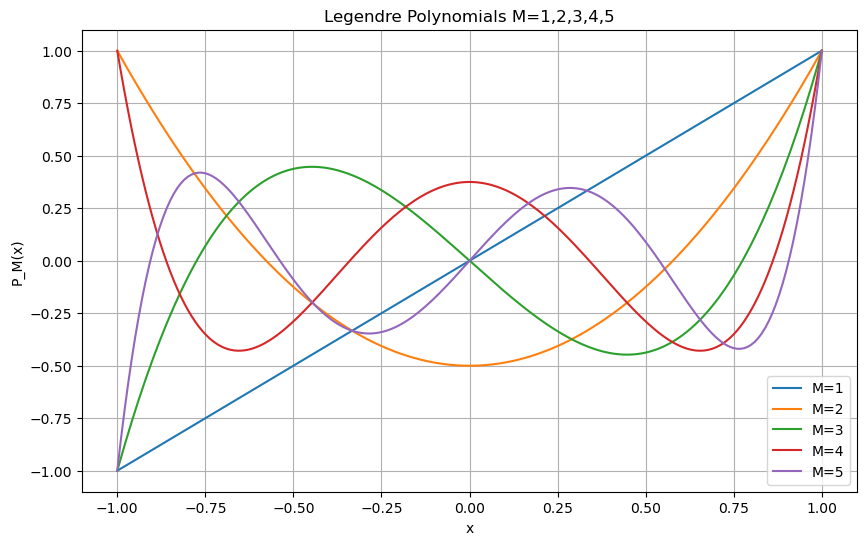

In [5]:

class Gauss_Quad_(Quad_):
    def __init__(self, fuc, N, a, b, order):
        super().__init__(fuc, N, a, b)  
        self.order = order

    def legendre_poly(self, x):
        P_M = np.poly1d([1])  
        for _ in range(self.order):
            P_M = np.polymul(P_M, np.poly1d([1, 0, -1]))  
        P_M = P_M * (1 / (2 ** self.order * np.math.factorial(self.order)))  
        P_M_deriv = np.polyder(P_M, self.order) 
        return P_M_deriv


x = np.linspace(-1, 1, 200)  

plt.figure(figsize=(10, 6))
for M in [1, 2, 3, 4, 5]:
    gauss_quad = Gauss_Quad_(x, 1, 1, 1, M)  # I put some fake number in it in order for it to plot, I try to put none but it won't work
    P_M = gauss_quad.legendre_poly(x)
    plt.plot(x, P_M(x), label=f'M={M}')

plt.title('Legendre Polynomials M=1,2,3,4,5')
plt.xlabel('x')
plt.ylabel('P_M(x)')
plt.legend()
plt.grid(True)
plt.show()




<div style="text-align: center;">
    <h3><strong> Newton's Method </strong></h3>
</div>
The positions of an order M Gauss-Legendre Quadrature are calculated by finding roots of an order-M Legendre polynomial,
 <br>  <br> 
$$P_M(x)=0.$$
 <br> 
To numerically find those roots (M of them), we can use the Newton's method: 
 <br> 
$$x_{n+1} = x_{n} - \frac{P_M(x_{n})}{P_M'(x_{n})}.$$
You should be careful on the initial guess.
 <br> 
The weights $w_i$ for Gauss-Legendre Quadrature are calculated as:
$$w_i = \frac{2}{(1 - x_i^2) [P'_M(x_i)]^2}$$
where $P'_M(x_i)$ is the derivative of the Legendre polynomial of degree M evaluated at each root $x_i$. 

## E) 
 Calculate 'M' position and weights for Gaussian quadrature integration between 'a' and 'b' with the Newton's method. Returns a tuple of 2 arrays, the first array is the position of points and second array is the corresponding weights. Output an text file that contains the roots and weights for M=[1,2,3,4,5]. 

In [6]:
# Add the following to the class in part D). 
# part D --------------------------------------------
class Gauss_Quad_(Quad_):
    def __init__(self, fuc, N, a, b, order):
        super().__init__(fuc, N, a, b)  
        self.order = order

    def legendre_poly(self, x):
        P_M = np.poly1d([1])  
        for _ in range(self.order):
            P_M = np.polymul(P_M, np.poly1d([1, 0, -1]))  
        P_M = P_M * (1 / (2 ** self.order * np.math.factorial(self.order)))  
        P_M_deriv = np.polyder(P_M, self.order) 
        return P_M_deriv
   
    
    def find_roots_and_weights(self):
        '''Calculate the positions and weights for Gaussian quadrature integration using Newton's method.'''
        roots = np.zeros(self.order)
        weights = np.zeros(self.order)
        x0 = np.cos(np.pi * (np.arange(1, 2*self.order, 2)) / (2*self.order))

        P_M = self.legendre_poly(np.poly1d([1]))
        P_M_prime = np.polyder(P_M)

        for i in range(self.order):
            x = x0[i]
            for _ in range(100):  # Max iterations
                P_M_x = np.polyval(P_M, x)
                P_M_prime_x = np.polyval(P_M_prime, x)
                x_new = x - P_M_x / P_M_prime_x
                if np.abs(x_new - x) < 1e-14:
                    break
                x = x_new

            roots[i] = x
            weights[i] = 2 / ((1 - x**2) * (P_M_prime_x)**2)

        roots = 0.5 * (roots * (self.b - self.a) + (self.b + self.a))
        weights = weights * 0.5 * (self.b - self.a)
        
        return roots, weights

    def write_roots_weights_to_file(self):
        '''Write the roots and weights to a text file.'''
        with open('gauss_legendre_roots_weights.txt', 'w') as file:
            for M in [1, 2, 3, 4, 5]:
                self.order = M
                roots, weights = self.find_roots_and_weights()
                file.write(f'Order M={M}\n')
                file.write('Roots: ' + ' '.join(map(str, roots)) + '\n')
                file.write('Weights: ' + ' '.join(map(str, weights)) + '\n')
                file.write('\n')
gauss_quad = Gauss_Quad_(lambda x: x, 1, -1, 1, 3)  # Order 3 is just a placeholder here
gauss_quad.write_roots_weights_to_file()

## F) 
Using the the following information,
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_legendre.html
, calculate the roots and weights for M=[1,2,3,4,5]. Do they agree with what you calculate in E)?  

In [7]:
# Add the following to the class in part D). 
from scipy.special import roots_legendre 
for M in [1, 2, 3, 4, 5]:
    roots_scipy, weights_scipy = roots_legendre(M)
    print(f"SciPy Results for M={M}:")
    print("Roots:", roots_scipy)
    print("Weights:", weights_scipy)
    print()
with open('gauss_legendre_roots_weights.txt', 'r') as file:
    gauss_legendre_data = file.read()

print("Comparison with Newton's method:")
print(gauss_legendre_data)


SciPy Results for M=1:
Roots: [0.]
Weights: [2.]

SciPy Results for M=2:
Roots: [-0.57735027  0.57735027]
Weights: [1. 1.]

SciPy Results for M=3:
Roots: [-0.77459667  0.          0.77459667]
Weights: [0.55555556 0.88888889 0.55555556]

SciPy Results for M=4:
Roots: [-0.86113631 -0.33998104  0.33998104  0.86113631]
Weights: [0.34785485 0.65214515 0.65214515 0.34785485]

SciPy Results for M=5:
Roots: [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
Weights: [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]

Comparison with Newton's method:
Order M=1
Roots: 6.123233995736766e-17
Weights: 2.0

Order M=2
Roots: 0.5773502691896258 -0.5773502691896258
Weights: 0.9999999999999998 0.9999999999999998

Order M=3
Roots: 0.7745966692414834 6.123233995736766e-17 -0.7745966692414834
Weights: 0.5555555555555554 0.8888888888888888 0.5555555555555554

Order M=4
Roots: 0.8611363115940527 0.3399810435848563 -0.3399810435848563 -0.8611363115940527
Weights: 0.34785484513745385 0.6521451

## G)
Based on the roots and weights, write a method that output the Gauss-Legendre Quadrature. 

In [8]:
# Add the following to the class in part D).
class Gauss_Quad_(Quad_):
    def __init__(self, fuc, N, a, b, order):
        super().__init__(fuc, N, a, b)  
        self.order = order
        self.fuc = fuc
    def legendre_poly(self, x):
        P_M = np.poly1d([1])  
        for _ in range(self.order):
            P_M = np.polymul(P_M, np.poly1d([1, 0, -1]))  
        P_M = P_M * (1 / (2 ** self.order * np.math.factorial(self.order)))  
        P_M_deriv = np.polyder(P_M, self.order) 
        return P_M_deriv
   
    
    def find_roots_and_weights(self):
        '''Calculate the positions and weights for Gaussian quadrature integration using Newton's method.'''
        roots = np.zeros(self.order)
        weights = np.zeros(self.order)
        x0 = np.cos(np.pi * (np.arange(1, 2*self.order, 2)) / (2*self.order))

        P_M = self.legendre_poly(np.poly1d([1]))
        P_M_prime = np.polyder(P_M)

        for i in range(self.order):
            x = x0[i]
            for _ in range(100):  
                P_M_x = np.polyval(P_M, x)
                P_M_prime_x = np.polyval(P_M_prime, x)
                x_new = x - P_M_x / P_M_prime_x
                if np.abs(x_new - x) < 1e-14:
                    break
                x = x_new

            roots[i] = x
            weights[i] = 2 / ((1 - x**2) * (P_M_prime_x)**2)

        roots = 0.5 * (roots * (self.b - self.a) + (self.b + self.a))
        weights = weights * 0.5 * (self.b - self.a)
        
        return roots, weights

    def write_roots_weights_to_file(self):
        '''Write the roots and weights to a text file.'''
        with open('gauss_legendre_roots_weights.txt', 'w') as file:
            for M in [1, 2, 3, 4, 5]:
                self.order = M
                roots, weights = self.find_roots_and_weights()
                file.write(f'Order M={M}\n')
                file.write('Roots: ' + ' '.join(map(str, roots)) + '\n')
                file.write('Weights: ' + ' '.join(map(str, weights)) + '\n')
                file.write('\n')
    def gauss_legendre_quadrature(self):
            """
            Perform Gauss-Legendre Quadrature to approximate.
            """
            roots, weights = self.find_roots_and_weights()

            integral_approximation = sum(self.fuc(x) * w for x, w in zip(roots, weights))
            return integral_approximation
            
f = lambda x: x**2  
order = 5  
a, b = 0, 1  
N = 100  # just a placeholder here


gauss_quad = Gauss_Quad_(f, N, a, b, order)
roots, weights = gauss_quad.find_roots_and_weights()

print('Roots:', roots)
print('Weights:', weights)

integral = gauss_quad.gauss_legendre_quadrature()
print(f"The approximate integral of f over [{a}, {b}] is: {integral}")


Roots: [0.95308992 0.76923466 0.5        0.23076534 0.04691008]
Weights: [0.11846344 0.23931434 0.28444444 0.23931434 0.11846344]
The approximate integral of f over [0, 1] is: 0.3333333333333332


<div style="text-align: center;">
    <h3><strong> Quadrature on test functions </strong></h3>
</div>

In the following question, we want to Use the above four methods, mid_quad, trapz_quad, simpson_quad, gauss_quad, to numerically calculate the quarature on two test functions ($k\geq 0)$

A general k-th order polynomial with a quadrature, 
$$I^{\rm T=A}_{\rm true}=\int_{a}^b dx x^k=\frac{1}{k+1}(b^{k+1}-a^{k+1})$$

A Fermi–Dirac distribution with a quadrature, 
$$I^{\rm T=B}_{\rm true}=\int_{a}^b dx \frac{1}{{1 + e^{-kx}}}=\frac{1}{k}(\log(e^{kb}+1)-\log(e^{ka}+1))$$


Let's define the following: for each order k and N, we have the quadrature value and the relative error,
1) mid_quad: $M(k,N)$,<br><br> $\Delta M(k,N)=2\frac{I_{\rm true}-M(k,N)}{I_{\rm true}+M(k,N)}$,
<br><br><br>
2) trapz_quad: $T(k,N)$,<br><br> $\Delta T(k,N)=2\frac{I_{\rm true}-T(k,N)}{I_{\rm true}+T(k,N)}$,
<br><br><br>
3) simpson_quad: $S(k,N)$,<br><br> $\Delta S(k,N)=2\frac{I_{\rm true}-S(k,N)}{I_{\rm true}+S(k,N)}$,
<br><br><br>
4) gauss_quad: $G(k,N)$,<br><br> $\Delta G(k,N)=2\frac{I_{\rm true}-G(k,N)}{I_{\rm true}+G(k,N)}$,

Let's make the following heatmap for each quadrature method above, 1-4), over the range $[0,1]$: 

y-axis: k from 0 to 10

x-axis: N from 10 to $10^5$

value: relative error




## H) Polynomial





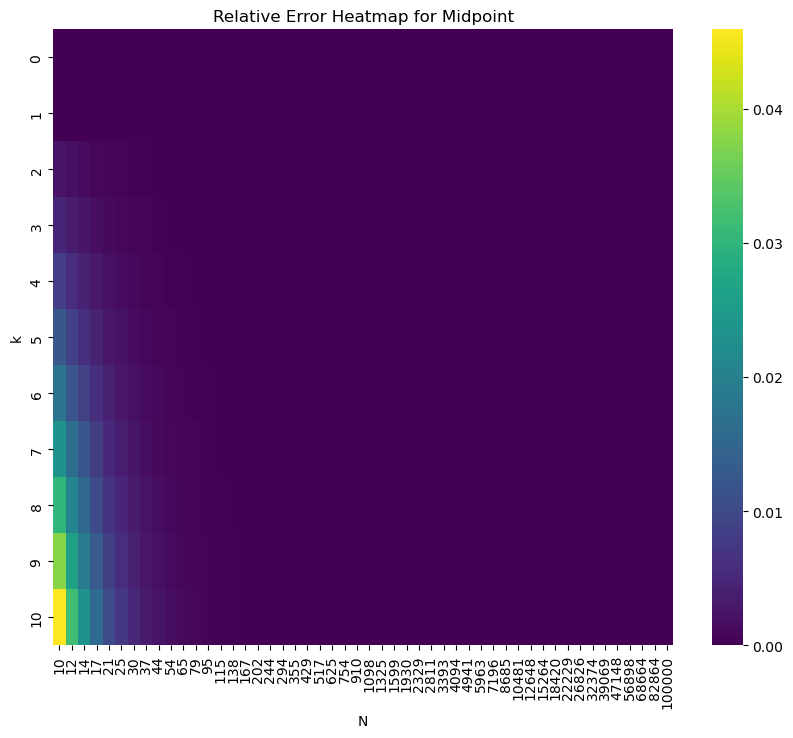

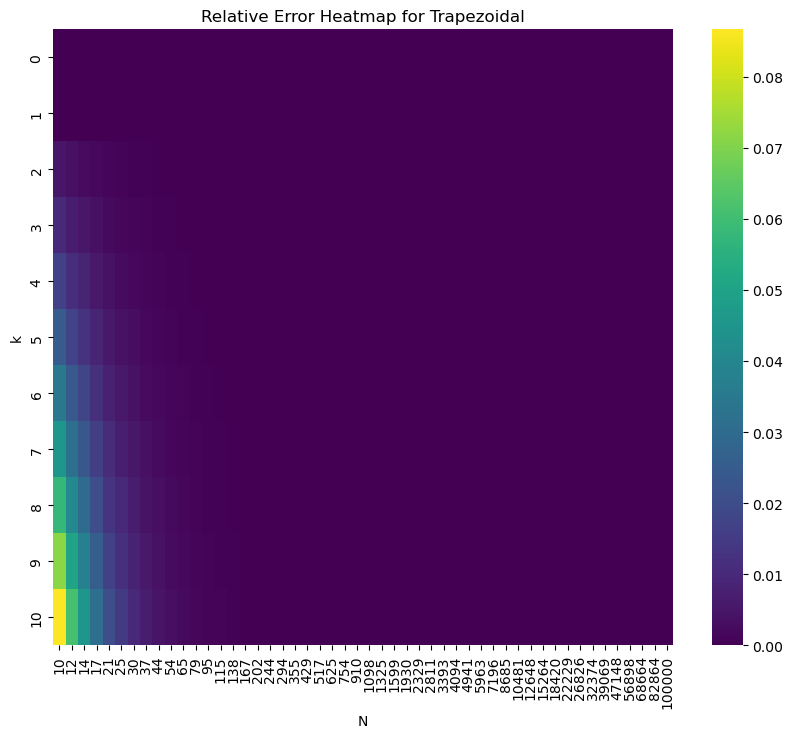

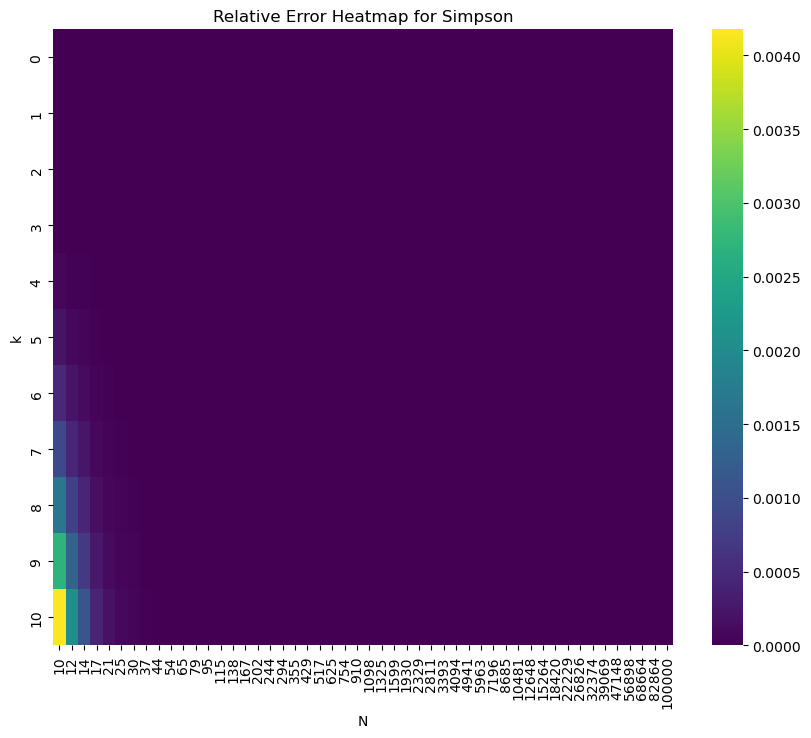

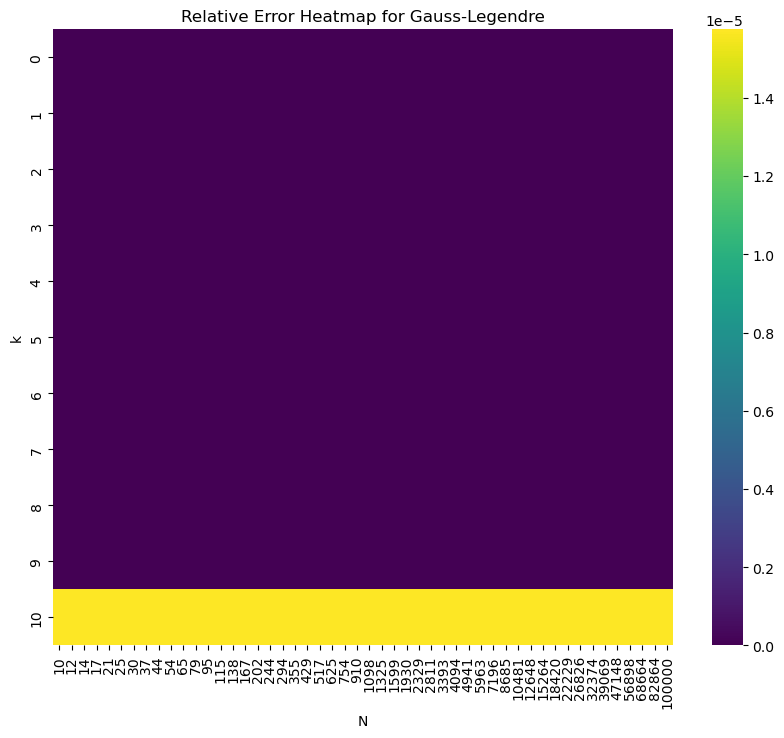

'--------------------Write your code above this line------------------------------'

In [9]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the true integral function for k-th order polynomial
def true_integral(k, a, b):
    return (b**(k+1) - a**(k+1)) / (k+1)

# Create arrays for k and N values
k_values = np.arange(0, 11)
N_values = np.logspace(1, 5, num=50, dtype=int)

# Initialize error matrices for each method
errors_mid = np.zeros((len(k_values), len(N_values)))
errors_trapz = np.zeros((len(k_values), len(N_values)))
errors_simpson = np.zeros((len(k_values), len(N_values)))
errors_gauss = np.zeros((len(k_values), len(N_values)))

# Compute the relative error for each method and populate the error matrices
for i, k in enumerate(k_values):
    f_k = lambda x: x**k  # Define the function for the current k
    I_true = true_integral(k, a=0, b=1)
    for j, N_original in enumerate(N_values):
        N_simpson = N_original + 1 if N_original % 2 == 1 else N_original
        N_gauss = N_original  # Gauss does not need adjustment
        
        # Create instances of the quadrature class with the possibly adjusted N for Simpson's rule
        quad_mid_trapz = Quad_(f_k, N_original, a=0, b=1)
        quad_simpson = Quad_(f_k, N_simpson, a=0, b=1)

        # Compute the quadratures
        M = quad_mid_trapz.midpoint_2()
        T = quad_mid_trapz.trapezoidal()
        S = quad_simpson.simpsons()

        # Compute Gauss quadrature with appropriate order
        order = min(k+1, 5)  # Assuming we have precomputed roots for orders up to 5
        gauss_quad = Gauss_Quad_(f_k, N_gauss, a=0, b=1, order=order)
        G = gauss_quad.gauss_legendre_quadrature()

        # Compute the relative errors
        errors_mid[i, j] = 2 * np.abs(I_true - M) / (I_true + M)
        errors_trapz[i, j] = 2 * np.abs(I_true - T) / (I_true + T)
        errors_simpson[i, j] = 2 * np.abs(I_true - S) / (I_true + S)
        errors_gauss[i, j] = 2 * np.abs(I_true - G) / (I_true + G)

# Helper function to create a heatmap
def create_heatmap(data, method_name, k_values, N_values):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, xticklabels=N_values, yticklabels=k_values, cmap="viridis", fmt=".2e")
    plt.title(f'Relative Error Heatmap for {method_name}')
    plt.xlabel('N')
    plt.ylabel('k')
    plt.show()

# Create heatmaps for each quadrature method
create_heatmap(errors_mid, 'Midpoint', k_values, N_values)
create_heatmap(errors_trapz, 'Trapezoidal', k_values, N_values)
create_heatmap(errors_simpson, 'Simpson', k_values, N_values)
create_heatmap(errors_gauss, 'Gauss-Legendre', k_values, N_values)




'''--------------------Write your code above this line------------------------------'''

## H) Fermi–Dirac


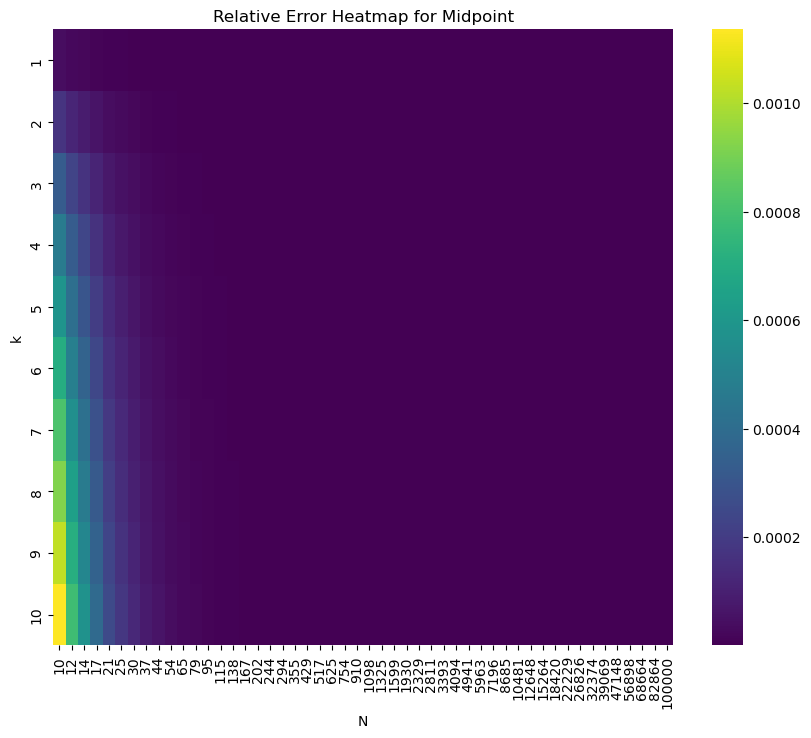

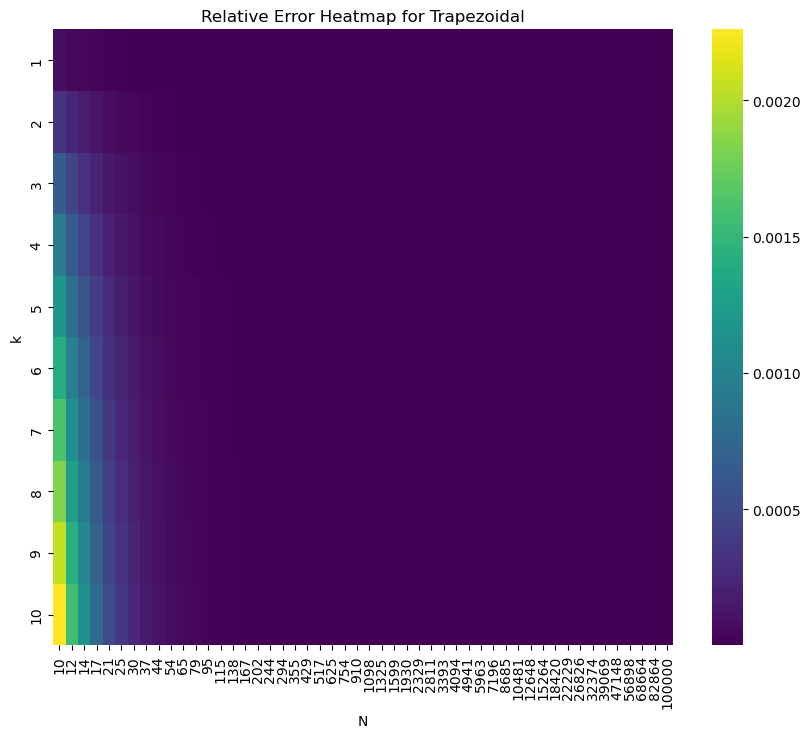

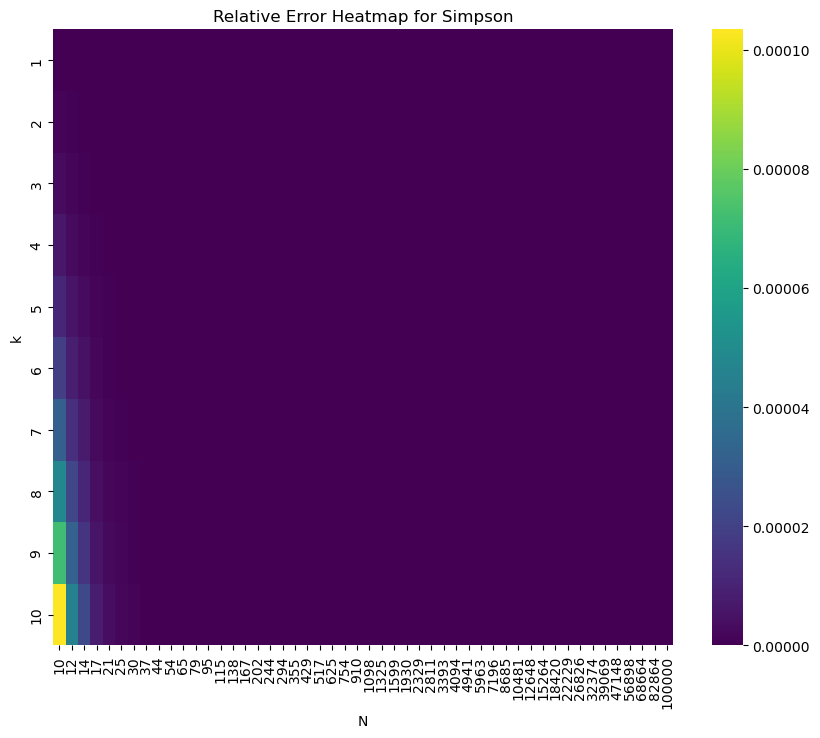

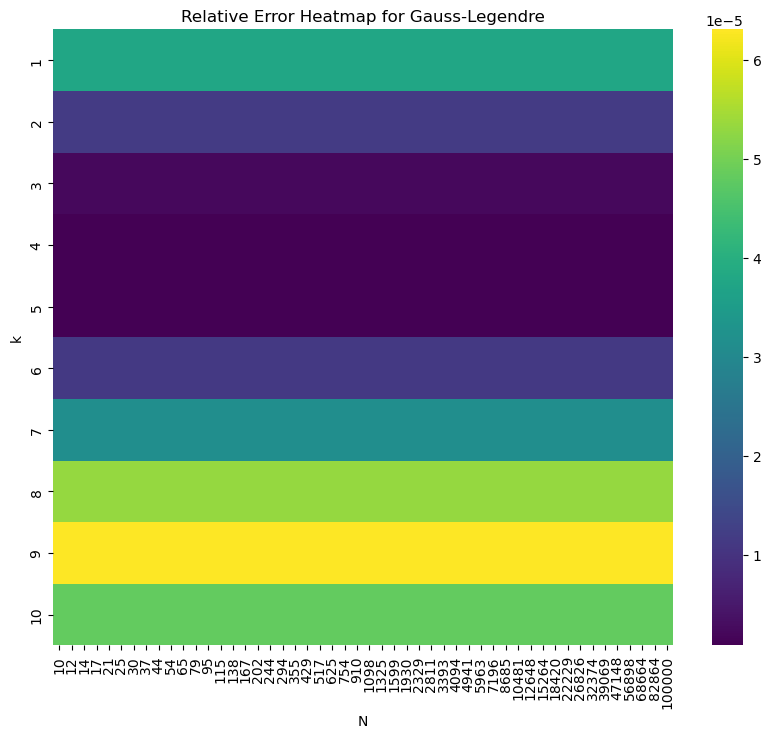

'--------------------Write your code above this line------------------------------'

In [16]:


'''--------------------Write your code below this line------------------------------'''
from matplotlib.ticker import FixedLocator
# Fermi-Dirac integrand
def fermi_dirac_integrand(x, k):
    return 1 / (1 + np.exp(-k * x))

# Exact value of the integral using the provided formula
def fermi_dirac_exact(k, a, b):
    return (1/k) * (np.log(np.exp(k * b) + 1) - np.log(np.exp(k * a) + 1)) if k != 0 else b - a


k_values = np.arange(1, 11)
N_values = np.logspace(1, 5, num=50, dtype=int)

# Initialize error matrices for each method
errors_mid = np.zeros((len(k_values), len(N_values)))
errors_trapz = np.zeros((len(k_values), len(N_values)))
errors_simpson = np.zeros((len(k_values), len(N_values)))
errors_gauss = np.zeros((len(k_values), len(N_values)))

# Compute the relative error for each method and populate the error matrices
for i, k in enumerate(k_values):
    # Define the Fermi-Dirac function for the current k
    f_k = lambda x: fermi_dirac_integrand(x, k)
    I_true = fermi_dirac_exact(k, a=0, b=1)
    for j, N_original in enumerate(N_values):
        N_simpson = N_original + 1 if N_original % 2 == 1 else N_original
        N_gauss = N_original  # Gauss does not need adjustment
        
        # Create instances of the quadrature class with the possibly adjusted N for Simpson's rule
        quad_mid_trapz = Quad_(f_k, N_original, a=0, b=1)
        quad_simpson = Quad_(f_k, N_simpson, a=0, b=1)

        # Compute the quadratures
        M = quad_mid_trapz.midpoint()
        T = quad_mid_trapz.trapezoidal()
        S = quad_simpson.simpsons()

        # Compute Gauss quadrature with appropriate order
        order = min(k+1, 5)  # Assuming we have precomputed roots for orders up to 5
        gauss_quad = Gauss_Quad_(f_k, N_gauss, a=0, b=1, order=order)
        G = gauss_quad.gauss_legendre_quadrature()

        # Compute the relative errors
        errors_mid[i, j] = 2 * np.abs(I_true - M) / (I_true + M)
        errors_trapz[i, j] = 2 * np.abs(I_true - T) / (I_true + T)
        errors_simpson[i, j] = 2 * np.abs(I_true - S) / (I_true + S)
        errors_gauss[i, j] = 2 * np.abs(I_true - G) / (I_true + G)

# Helper function to create a heatmap
def create_heatmap(data, method_name, k_values, N_values):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, xticklabels=N_values, yticklabels=k_values, cmap="viridis", fmt=".2e")
    plt.title(f'Relative Error Heatmap for {method_name}')
    plt.xlabel('N')
    plt.ylabel('k')
    plt.show()

# Create heatmaps for each quadrature method
create_heatmap(errors_mid, 'Midpoint', k_values, N_values)
create_heatmap(errors_trapz, 'Trapezoidal', k_values, N_values)
create_heatmap(errors_simpson, 'Simpson', k_values, N_values)
create_heatmap(errors_gauss, 'Gauss-Legendre', k_values, N_values)

'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Harmonic Oscillator </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 1. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total energy of a harmonic oscillator is given by <br>
$$ E = \frac{1}{2}m \left(\frac{dx}{dt}\right)^2 + V(x) $$
Assuming that the potential $V(x)$ is symmetric about $x=0$ and the amplitude of the oscillator is $a$. Then the equation for the time period is given by <br>
$$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}} $$


## A)
Suppose the potential is $V(x) = x^4$ and mass of the particle $m=1$, write a function that calculates the period for a given amplitude.

In [17]:
import numpy as np

def V(x):
    #potential function.
    return x**4

def trapezoidal_rule(f, a, b, n):
   #use trapezoidal rule.
    h = (b - a) / n
    sum_f = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        sum_f += f(a + i * h)
    return h * sum_f

def time_period(a, N, epsilon=1e-6):
    #time period
    def integrand(x):
        return 1 / np.sqrt(V(a) - V(x))

    integral = trapezoidal_rule(integrand, 0, a - epsilon, N)
    T = np.sqrt(8) * integral
    return T


amplitude = 2
intervals = 10000
period = time_period(amplitude, intervals)
print(f"The period for amplitude {amplitude} is approximately {period}")


The period for amplitude 2 is approximately 1.8937022035840732


## B) 
Let $a = 2$. Use inbuilt 'fixed_quad' (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.fixed_quad.html) function to calculate the time period for different values of 'N' (number of integration points). Calculate the error in the integral by estimating the difference for 'N' & '2N'. Approximately, at what 'N' is the absolute error less than $10^{-4}$ for 'a = 2'?

In [3]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import fixed_quad

def V(x):
    return x**4

def timep(x, a):
    return 1 / np.sqrt(V(a) - V(x))

def calculate_period_with_fixed_quad(a, N):
    integral, _ = fixed_quad(timep, 0, a, args=(a,), n=N)
    T = np.sqrt(8) * integral
    return T

a = 2
accuracy = 1e-4
N = 10

while True:
    T_N = calculate_period_with_fixed_quad(a, N)
    T_2N = calculate_period_with_fixed_quad(a, 2 * N)
    error = abs(T_N - T_2N)

    if error < accuracy:
        break

    N *= 2

print(f"The required N for an absolute error less than {accuracy} is: {N}")


'''--------------------Write your code above this line------------------------------'''

The required N for an absolute error less than 0.0001 is: 5120


'--------------------Write your code above this line------------------------------'

## C) 
Use inbuilt 'quad' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function that returns an error estimate and compare your answer for 'a = 2' (quad uses a more advanced integration technique)

In [30]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import quad

def V(x):
    return x**4

def timep(x, a):
    return 1 / np.sqrt(V(a) - V(x))

def calculate_period_with_quad(a):
    integral, error_estimate = quad(timep, 0, a, args=(a,))
    T = np.sqrt(8) * integral
    return T, error_estimate

a = 2
T, error_estimate = calculate_period_with_quad(a)

print(f"Time period for a = {a} is: {T}")
print(f"Estimated error using quad: {error_estimate}")


'''--------------------Write your code above this line------------------------------'''

Time period for a = 2 is: 1.854074677301701
Estimated error using quad: 7.095168896853465e-11


'--------------------Write your code above this line------------------------------'

 ## D) 
Calculate the time period by using the inbuilt romberg function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html) for Romberg integration. 
A simplistic usage with romberg(func, 0, a), where a is the amplitude, will probably give error or 'nan'. Why? 

In [23]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import romberg


def time_period_romberg(a):
    #using Romberg integration.
    def integrand(x):
        return 1 / np.sqrt(V(a) - V(x))


    integral = romberg(integrand, 0, a )
    T = np.sqrt(8) * integral
    return T

#example
a = 2
period = time_period_romberg(a)
print(f"The period for amplitude {a} is {period}")

#the integrand function 1/sqrt(V(a)−V(x)) becomes singular as x approaches a, since V(a)−V(a)=0 leads to a division by zero. 
'''--------------------Write your code above this line------------------------------'''

The period for amplitude 2 is nan


/tmp/ipykernel_2289/1987276109.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 / np.sqrt(V(a) - V(x))


'--------------------Write your code above this line------------------------------'

## E) 
Assume that we can tolerate the uncertainitiy of $10^{-5}$ in the position. Show and output of 'keyword' show = True for 'a = 2'. Use this to estimate error for divmax = 10.


In [24]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import romberg



def time_period_romberg_with_error_estimation(a, divmax=10, tol=1e-5, epsilon=1e-6):
    def integrand(x):
        return 1 / np.sqrt(V(a) - V(x))

    integral = romberg(integrand, 0, a - epsilon, divmax=divmax, tol=tol, show=True)
    T = np.sqrt(8) * integral
    return T

a = 2
period = time_period_romberg_with_error_estimation(a)
print(f"\nThe period for amplitude {a} is {period}")


'''--------------------Write your code above this line------------------------------'''

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7fba35cb54e0> from [0, 1.999999]

 Steps  StepSize   Results
     1  1.999999 177.026673 
     2  1.000000 88.771535 59.353156 
     4  0.500000 44.662198 29.959086 27.999481 
     8  0.250000 22.621785 15.274981 14.296040 14.078526 
    16  0.125000 11.612172  7.942302  7.453456  7.344844  7.318437 
    32  0.062500  6.115030  4.282649  4.038672  3.984469  3.971291  3.968019 
    64  0.031250  3.371936  2.457572  2.335900  2.308872  2.302301  2.300670  2.300262 
   128  0.015625  2.004284  1.548400  1.487788  1.474326  1.471053  1.470241  1.470038  1.469987 
   256  0.007812  1.323218  1.096196  1.066049  1.059355  1.057728  1.057324  1.057223  1.057198  1.057191 
   512  0.003906  0.984639  0.871780  0.856819  0.853498  0.852690  0.852490  0.852440  0.852428  0.852424  0.852424 
  1024  0.001953  0.816732  0.760763  0.753362  0.751720  0.751321  0.751222  0.751197  0.751191  0.751189  0.751189  0.751189 

The final resul

'--------------------Write your code above this line------------------------------'

## F)
 Change divmax to change the number of divisions. How does the accuracy change on going from 10 to 15 divisions.

In [25]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import romberg



def time_period_romberg_with_error_estimation(a, divmax=10, tol=1e-5, epsilon=1e-6):
    def integrand(x):
        return 1 / np.sqrt(V(a) - V(x))

    integral = romberg(integrand, 0, a - epsilon, divmax=divmax, tol=tol, show=True)
    T = np.sqrt(8) * integral
    return T

a = 2

print("Results with divmax=10:")
period_divmax_10 = time_period_romberg_with_error_estimation(a, divmax=10)
print(f"\nThe period for amplitude {a} with divmax=10 is approximately {period_divmax_10}\n")


print("Results with divmax=15:")
period_divmax_15 = time_period_romberg_with_error_estimation(a, divmax=15)
print(f"\nThe period for amplitude {a} with divmax=15 is approximately {period_divmax_15}")

'''--------------------Write your code above this line------------------------------'''

Results with divmax=10:
Romberg integration of <function vectorize1.<locals>.vfunc at 0x7fba35cb7d80> from [0, 1.999999]

 Steps  StepSize   Results
     1  1.999999 177.026673 
     2  1.000000 88.771535 59.353156 
     4  0.500000 44.662198 29.959086 27.999481 
     8  0.250000 22.621785 15.274981 14.296040 14.078526 
    16  0.125000 11.612172  7.942302  7.453456  7.344844  7.318437 
    32  0.062500  6.115030  4.282649  4.038672  3.984469  3.971291  3.968019 
    64  0.031250  3.371936  2.457572  2.335900  2.308872  2.302301  2.300670  2.300262 
   128  0.015625  2.004284  1.548400  1.487788  1.474326  1.471053  1.470241  1.470038  1.469987 
   256  0.007812  1.323218  1.096196  1.066049  1.059355  1.057728  1.057324  1.057223  1.057198  1.057191 
   512  0.003906  0.984639  0.871780  0.856819  0.853498  0.852690  0.852490  0.852440  0.852428  0.852424  0.852424 
  1024  0.001953  0.816732  0.760763  0.753362  0.751720  0.751321  0.751222  0.751197  0.751191  0.751189  0.751189  0.

/home/pengsen/anaconda3/lib/python3.11/site-packages/scipy/integrate/_quadrature.py:1074: AccuracyWarning: divmax (15) exceeded. Latest difference = 2.601761e-03
  warnings.warn(


'--------------------Write your code above this line------------------------------'

## G) 
Use the function to make a graph of the period for amplitude ranging from a=0 to a=2.

/tmp/ipykernel_2289/3482560560.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 / np.sqrt(V(a) - V(x))
/tmp/ipykernel_2289/3482560560.py:10: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(V(a) - V(x))


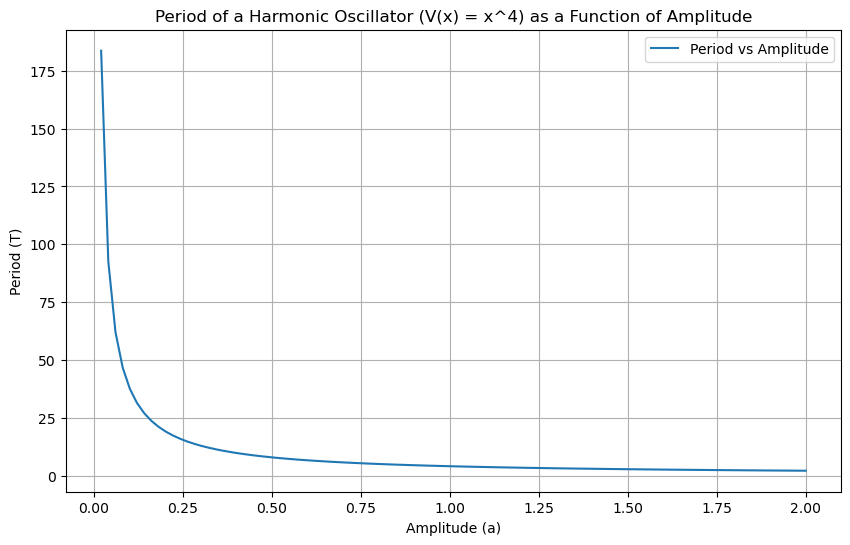

'--------------------Write your code above this line------------------------------'

In [28]:


'''--------------------Write your code below this line------------------------------'''
import matplotlib.pyplot as plt

from scipy.integrate import romberg



def time_period_romberg_with_error_estimation(a, divmax=10, tol=1e-5, epsilon=1e-6):
    def integrand(x):
        return 1 / np.sqrt(V(a) - V(x))

    integral = romberg(integrand, 0, a - epsilon, divmax=divmax, tol=tol)
    T = np.sqrt(8) * integral
    return T

#period for a range of amplitude values
amplitudes = np.linspace(0, 2, 100)  #100 points from 0 to 2
periods = [time_period_romberg_with_error_estimation(a, divmax=10) for a in amplitudes]

plt.figure(figsize=(10, 6))
plt.plot(amplitudes, periods, label='Period vs Amplitude')
plt.xlabel('Amplitude (a)')
plt.ylabel('Period (T)')
plt.title('Period of a Harmonic Oscillator (V(x) = x^4) as a Function of Amplitude')
plt.grid(True)
plt.legend()
plt.show()


'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Black Body Radiation </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 2. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total rate at which energy is radiated by a black body per unit area over all frequencies is 

$$ W = \frac{2 \pi k_B^4T^4}{c^2 {h}^3} \int _0^\infty \frac{x^3}{e^x -1} dx $$


## A) 
Write a function to to evaluate the integral in this expression. You will need to change the variables to go from an infinite range to a finite range. What is the change of variable and new functional form? The variable to go from range 0 to $\infty$ to a finite range of is 

$$ z = \frac{x}{1+x} $$
or equivalently
$$ x = \frac{z}{1-z} $$


In [29]:
import numpy as np
#Constants
k = 1.38064852e-23 
h = 6.626e-34
pi= np.pi
c = 3e8
hb = h /2/pi
prefactor = k**4/c**2/hb**3/4/pi**2 
#True value
stfconst = 5.670367e-8

def blackbody_var(z):
    x = z / (1 - z)
    dx_dz = 1 / ((1 - z)**2)
    with np.errstate(over='ignore', invalid='ignore'):
        result = (x**3) / (np.exp(x) - 1) * dx_dz
        result[np.isnan(result) | np.isinf(result)] = 0
    return result

def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    integral = h * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5 * y[-1])
    return integral

n = 1000

epsilon = 1e-5
integral_value = trapezoidal_rule(blackbody_var, 0, 1 - epsilon, n)

W = prefactor * integral_value


print(f"integral value: {integral_value}")
print(f"total rate of energy radiated per unit area (W): {W}")

integral value: 6.493939402266858
total rate of energy radiated per unit area (W): 5.662703503454069e-08


## B) 
According to Stefan's law, the total energy given off by a black-body per unit area per second is given by 
$$ W = \sigma T^4 $$. Use the integral to calculate the value of Stefan Boltzmann constant $\sigma$. Use 'fixed_quad' function to do the integral.   


In [28]:


'''--------------------Write your code below this line------------------------------'''
def integrand(z):
    x = z / (1 - z)
    dx_dz = 1 / ((1 - z)**2)
    with np.errstate(over='ignore'):
        exp_x = np.exp(x)
        result = np.where(exp_x < 1e15, (x**3) / (exp_x - 1) * dx_dz, 0)
    return result

from scipy.integrate import fixed_quad

integral_value, _ = fixed_quad(integrand, 0, 1, n=50)  

#Stefan-Boltzmann constant
sigma = (2 * pi * k**4) / (c**2 * h**3) * integral_value

print(f"Calculated value of Stefan-Boltzmann constant (sigma): {sigma}")

'''--------------------Write your code above this line------------------------------'''

Calculated value of Stefan-Boltzmann constant (sigma): 5.662703501926314e-08


'--------------------Write your code above this line------------------------------'

## C) 
Inbuilt 'quad' function can support an infinite range for integration. Write another function to do the integration from 0 to $\infty$ and compare your answer.

In [30]:
from scipy.integrate import quad

'''--------------------Write your code below this line------------------------------'''
def original_integrand(x):
    return x**3 / (np.exp(x) - 1)

integral_value, _ = quad(original_integrand, 0, np.inf)

sigma = (2 * pi * k**4) / (c**2 * h**3) * integral_value

print(f"Calculated value of Stefan-Boltzmann constant (sigma) using quad: {sigma}")

'''--------------------Write your code above this line------------------------------'''

Calculated value of Stefan-Boltzmann constant (sigma) using quad: 5.662703503454044e-08


/tmp/ipykernel_2293/575751590.py:5: RuntimeWarning: overflow encountered in exp
  return x**3 / (np.exp(x) - 1)


'--------------------Write your code above this line------------------------------'

<div style="text-align: center;">
    <h2><strong> Planetary Orbit Integration </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 4. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


One of the great achievements in the history of science was the discovery of the laws of J. Kepler, based on many precise measurements of the positions of Mars by Tycho Brahe and himself. The planets move in elliptic orbits with the sun at one of the foci (Kepler’s first law).

Newton (Principia 1687) then explained this motion by his general law of gravitational attraction (proportional to $1/r^2$) and the relation between forces and acceleration. This then opened the way for treating arbitrary celestial motions by solving differential equations.


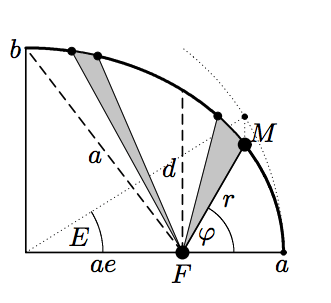


Consider the following two-body problem, wherein a single planet orbits around a large star. Stellar mass is much larger than planetary mass, so we choose the star as the center of our coordinate system. Now, consider the planet's two-dimensional elliptical orbit around the star. The position of the planet is given by the coordinates $q = (q_1, q_2)$, with the planet's velocity given by $p = \dot{q}$.

Newton's laws, with a suitable normalization, yield the following ordinary differential equations:

$$ \ddot{q_1} = -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\ \ \ \ddot{q_2} = -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. $$

This is equivalent to a Hamiltonian system with the Hamiltonian:
$$ H(p,q) = \frac{1}{2}(p_1^2 + p_2^2) - \frac{1}{\sqrt{q_1^2 + q_2^2}} $$
$$p_i = \dot{q_i}$$

We will consider the initial position and velocity of the planet to be:
$$ q_1(0) = 1-e,\ \ \ q_2(0) = 0,\ \ \ \dot{q_1}(0) = 0,\ \ \ \dot{q_2}(0) = \sqrt{\frac{1+e}{1-e}} $$

Now determine $q$ as a function of time $t$.




## A) 
 Q1. Using 400000 steps, use the explicit Euler method (Let $f(q) = \frac{dq}{dt}$. Then, $q(t+\Delta t) = \Delta t \cdot f(q)$ for small $\Delta t$) and plot the orbit of the planet. Assume $e = 0.6$ and integrate to a final time of $T_f = 200$.
 
 $$ q_{n+1} = q_n + \Delta t \cdot \dot{q_n} $$
$$ \dot{q}_{n+1} = p_{n+1} = p_n + \Delta t \cdot \dot{p_n} $$

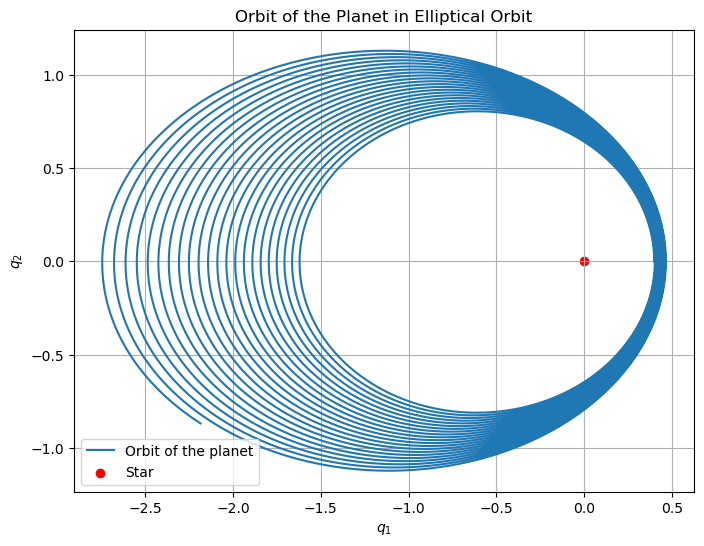

star is at the origin


'--------------------Write your code above this line------------------------------'

In [12]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

# constants
e = 0.6 
T_f = 200 
num_steps = 400000  
dt = T_f / num_steps  

# initial conditions
q1 = 1 - e
q2 = 0
p1 = 0
p2 = np.sqrt((1 + e) / (1 - e))

q1_values = np.zeros(num_steps)
q2_values = np.zeros(num_steps)

# Euler integration
for i in range(num_steps):
    q1_values[i] = q1
    q2_values[i] = q2
    p1_dot = -q1 / (q1**2 + q2**2)**(3/2)
    p2_dot = -q2 / (q1**2 + q2**2)**(3/2)
    q1 += dt * p1
    q2 += dt * p2
    p1 += dt * p1_dot
    p2 += dt * p2_dot



plt.figure(figsize=(8, 6))
plt.plot(q1_values, q2_values, label='Orbit of the planet')
plt.xlabel('$q_1$')
plt.ylabel('$q_2$')
plt.title('Orbit of the Planet in Elliptical Orbit')
plt.scatter([0], [0], color='red', label='Star')
plt.legend()
plt.grid(True)
plt.show()
print("star is at the origin")

'''--------------------Write your code above this line------------------------------'''

## B) 
Using 400000 steps, use the symplectic Euler method. 

$$ p_{n+1} = p_n - \Delta t H_q(p_{n+1}, q_n) $$
$$ q_{n+1} = q_n + \Delta t H_p(p_{n+1}, q_n) $$
or
$$ q_{n+1} = q_n + \Delta t H_p(p_n, q_{n+1}) $$
$$ p_{n+1} = p_n - \Delta t H_p(p_n, q_{n+1}) $$
where $H_p$ and $H_q$ denote the column vectors of partial derivatives of the Hamiltonian with respect to $p$ and $q$, respectively. i.e. $H_{p_1} = p_1, H_{q_1} = \frac{q_1}{(q_1^2 + q_2^2)^{3/2}}, H_{p_2} = p_2, H_{q_2} = \frac{q_2}{(q_1^2 + q_2^2)^{3/2}}$. 
 
 
Again plot the orbit of the planet. Compare your results in A) and B) by plotting both solutions in the same figure. 

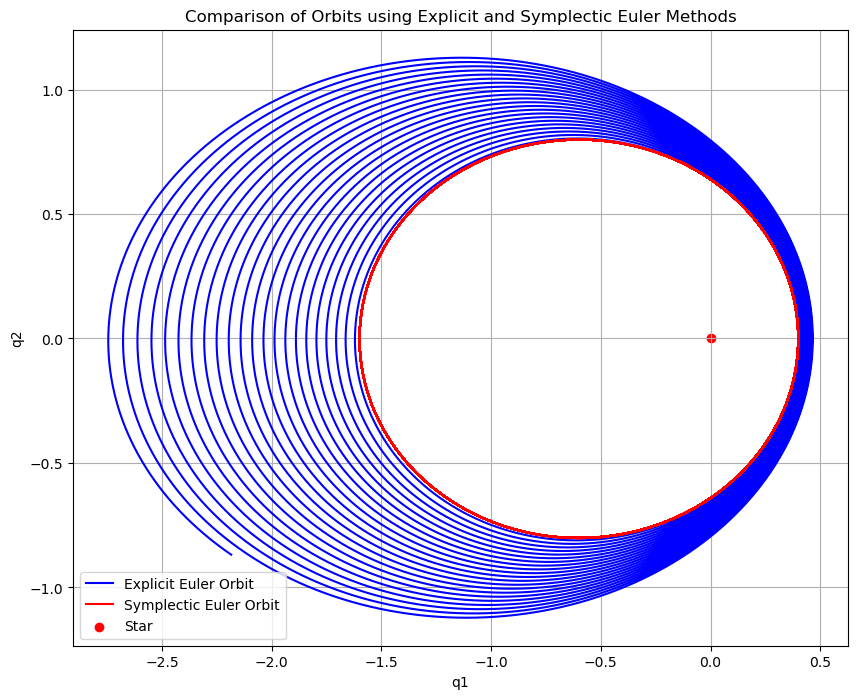

'--------------------Write your code above this line------------------------------'

In [9]:


'''--------------------Write your code below this line------------------------------'''
# constant
e = 0.6
Tf = 200
steps = 400000
dt = Tf / steps

# initial conditions 
q1_sym = np.zeros(steps)
q2_sym = np.zeros(steps)
p1_sym = np.zeros(steps)
p2_sym = np.zeros(steps)

q1_sym[0] = 1 - e
q2_sym[0] = 0
p1_sym[0] = 0
p2_sym[0] = np.sqrt((1 + e)/(1 - e))

# symplectic euler integration
for n in range(steps - 1):
    r3 = (q1_sym[n]**2 + q2_sym[n]**2)**1.5
    p1_sym[n + 1] = p1_sym[n] - dt * q1_sym[n] / r3
    p2_sym[n + 1] = p2_sym[n] - dt * q2_sym[n] / r3
    q1_sym[n + 1] = q1_sym[n] + dt * p1_sym[n + 1]
    q2_sym[n + 1] = q2_sym[n] + dt * p2_sym[n + 1]


plt.figure(figsize=(10, 8))

plt.plot(q1_values, q2_values, label='Explicit Euler Orbit', color='blue')

plt.plot(q1_sym, q2_sym, label='Symplectic Euler Orbit', color='red')

# Star position
plt.scatter([0], [0], color='red', label='Star')

plt.title('Comparison of Orbits using Explicit and Symplectic Euler Methods')
plt.xlabel('q1')
plt.ylabel('q2')
plt.legend()
plt.grid(True)
plt.show()


'''--------------------Write your code above this line------------------------------'''